## Computer Vision

The final stage of our project is about working a small computer vision model, through which it is possible to:

 - 1st: read the front cover of a movie and identify the title through the image;
 - 2nd: automaticlly search on the IMDb data based by the movie name obtained at stage 1, and display all its information.

In [1]:
#pip install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install easyocr
#!pip install imdbpy

In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import imdb

In [3]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('png') if isfile(join('png', f))]
files

['avatar.PNG', 'doorman.png', 'jumanji.png', 'scarystories.png']

In [4]:
#Chose a file from the list files
IMAGE_PATH = 'png/'+ files[0]

In [5]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(IMAGE_PATH, contrast_ths = 0.1, adjust_contrast = 0.5, add_margin = 0.2,
                         width_ths = 0.5, decoder = 'beamsearch')
result

Using CPU. Note: This module is much faster with a GPU.


[([[395, 17], [591, 17], [591, 80], [395, 80]],
  'DefinitiON',
  0.3445112337169379),
 ([[37, 511], [61, 511], [61, 545], [37, 545]], '3', 0.3380888683422292),
 ([[114, 505], [783, 505], [783, 682], [114, 682]],
  'AVATAR',
  0.9996068020234966),
 ([[286, 677], [528, 677], [528, 709], [286, 709]],
  'EXTENDED  COLLECTORS',
  0.7434456120497998),
 ([[532, 680], [620, 680], [620, 708], [532, 708]],
  'EDITION',
  0.9964956999019919),
 ([[356, 704], [546, 704], [546, 732], [356, 732]],
  'SPECIAL FEATURES',
  0.9778579865827076),
 ([[415, 729], [487, 729], [487, 753], [415, 753]],
  'DISC 3',
  0.9895880613846174),
 ([[183, 759], [207, 759], [207, 783], [183, 783]], '', 0.013340223178638588),
 ([[334, 796], [366, 796], [366, 810], [334, 810]], 'd', 0.04902739269812528),
 ([[248, 800], [292, 800], [292, 832], [248, 832]],
  '0,',
  0.033749857435734394),
 ([[459, 821], [485, 821], [485, 829], [459, 829]],
  'te',
  0.015092340112805143),
 ([[333, 833], [367, 833], [367, 857], [333, 857]],

<function matplotlib.pyplot.show(close=None, block=None)>

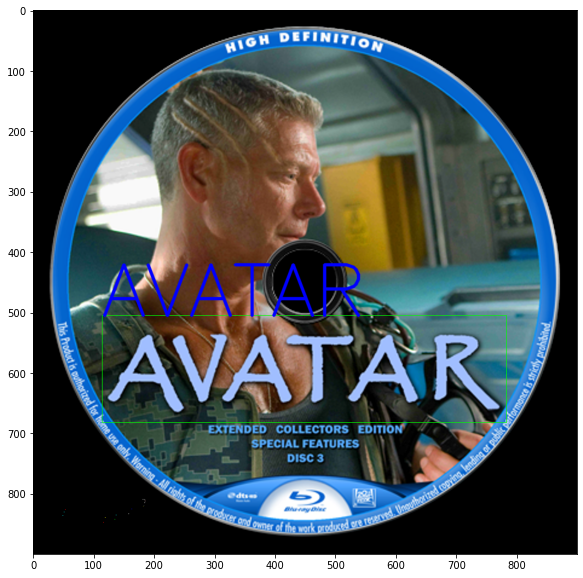

In [6]:
img = cv2.imread(IMAGE_PATH)
old_box_area = 0
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    boxH = bottom_right[1] - top_left[1]
    boxW = bottom_right[0] - top_left[0]
    box_area = boxH * boxW
    if box_area > old_box_area:
        title = detection[1]
        tf = top_left
        br = bottom_right
        old_box_area = box_area
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.rectangle(img, tf, br, (0,255,0),1)
img = cv2.putText(img, title, tf, font, 4, (255,0,0),4, cv2.LINE_AA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show

In [7]:
ia = imdb.IMDb()

In [8]:
movies = ia.search_movie(title)
movies

[<Movie id:0417299[http] title:_"Avatar: The Last Airbender" (2005)_>,
 <Movie id:0499549[http] title:_Avatar (2009)_>,
 <Movie id:0120347[http] title:_Tomorrow Never Dies (1997)_>,
 <Movie id:1630029[http] title:_Avatar 2 (2022)_>,
 <Movie id:1695360[http] title:_"The Legend of Korra" (2012)_>,
 <Movie id:0938283[http] title:_The Last Airbender (2010)_>,
 <Movie id:1133985[http] title:_Green Lantern (2011)_>,
 <Movie id:9018736[http] title:_"Avatar: The Last Airbender" (None)_>,
 <Movie id:1757678[http] title:_Avatar 3 (2024)_>,
 <Movie id:5637536[http] title:_Avatar 5 (2028)_>,
 <Movie id:3095356[http] title:_Avatar 4 (2026)_>,
 <Movie id:10732794[http] title:_"The King's Avatar" (2019)_>,
 <Movie id:2926746[http] title:_"The Avatars" (2013)_>,
 <Movie id:6859260[http] title:_"The King's Avatar" (2017)_>,
 <Movie id:4727514[http] title:_The Last Avatar (2014)_>,
 <Movie id:1775309[http] title:_Avatar (2011)_>,
 <Movie id:5921086[http] title:_Avatards (2016)_>,
 <Movie id:1517155[http